<div style="text-align: center; background: linear-gradient(to right, #6a11cb, #2575fc); padding: 30px; border-radius: 15px; box-shadow: 0 4px 12px rgba(0,0,0,0.2);">
  <h1 style="color: white; font-weight: 800; font-size: 32px; margin-bottom: 10px;">
    Transforming Charts into Data: A Deep Dive into DePlot’s Capabilities
  </h1>
  <p style="color: #e0fbfc; font-size: 18px; margin: 0;">
    A Practical Assessment of DePlot for Data Extraction from Visuals
  </p>
</div>

# **introduction**

[DePlot](https://huggingface.co/google/deplot) is a model developed by Google to convert visual data, such as charts and plots, into structured formats, enabling easier extraction of data for document parsing. It decomposes the process into two steps:

1. **Plot-to-text translation**: Converts charts into a structured table.
2. **Reasoning over the table**: Uses the table for reasoning tasks with pretrained language models (LLMs).

DePlot was trained on the **ChartQA dataset**, which consists of chart question-answering tasks. It outperforms state-of-the-art models fine-tuned on over 28,000 data points by achieving a 24.0% improvement in handling human-written queries.

# **1. Import Libraries**

In [29]:
from transformers import AutoProcessor, Pix2StructForConditionalGeneration
import requests
from PIL import Image
import pandas as pd
import re
import torch
from IPython.display import display, Image as IPImage, Markdown

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# **2. Load Deplot**

In [30]:
model = Pix2StructForConditionalGeneration.from_pretrained("google/deplot").to(device)
processor = AutoProcessor.from_pretrained("google/deplot")

# **3. Inference**

In [31]:
def convert_to_dataframe(input_text):
    """
    Converts structured input text into a pandas DataFrame.

    The input text should have a title on the first line, followed by rows separated by '<0x0A>' 
    and columns separated by '|'.

    Parameters:
    input_text (str): The input text.

    Returns:
    pd.DataFrame: The DataFrame representing the table.
    """
    lines = input_text.split('<0x0A>')
    title = lines[0]
    table_data = [line.strip() for line in lines[1:] if line.strip()]
    
    table_rows = []
    for row in table_data:
        columns = re.split(r'\s*\|\s*', row)
        table_rows.append(columns)
    
    df = pd.DataFrame(table_rows[1:], columns=table_rows[0])
    return df

In [32]:
def plot_to_table(image_path):
    display(Markdown("### 📸 Input Image"))
    
    display(IPImage(image_path))
    
    image = Image.open(image_path)
    inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt").to(device)
    predictions = model.generate(**inputs, max_new_tokens=1000)
    markdown_output = processor.decode(predictions[0], skip_special_tokens=True)

    df = convert_to_dataframe(markdown_output)
    display(Markdown("### 📊 Plot Converted to Table with Deplot"))
    
    display(df)

## **Example n°1**

### 📸 Input Image

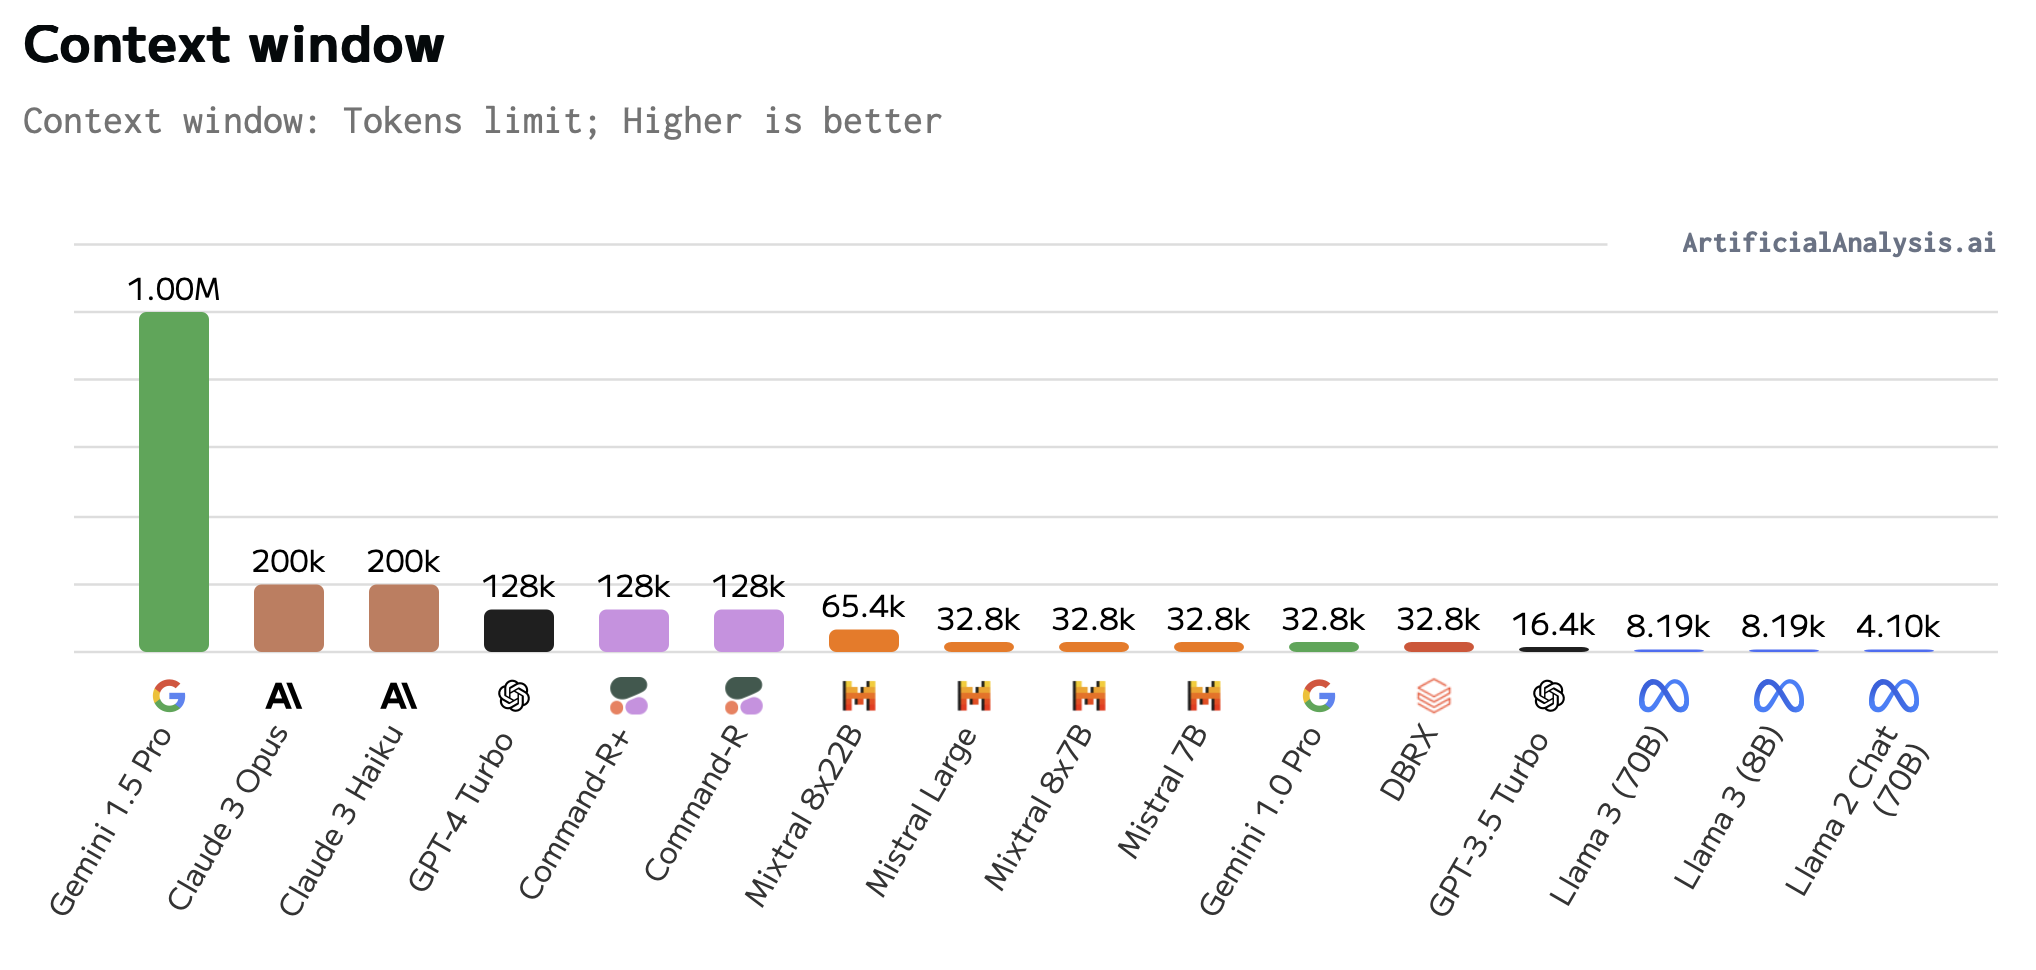

### 📊 Plot Converted to Table with Deplot

,,Artificial
0,Analysis,None
1,Context window,Context window
2,Context window,Context window
3,Context window,None
4,Genin75Pro,100M
...,...,...
436,L,None
437,L,None
438,L,None
439,L,None


In [33]:
plot_to_table("/kaggle/input/plots-and-tables-images/context_window.png")

## **Example n°2**

### 📸 Input Image

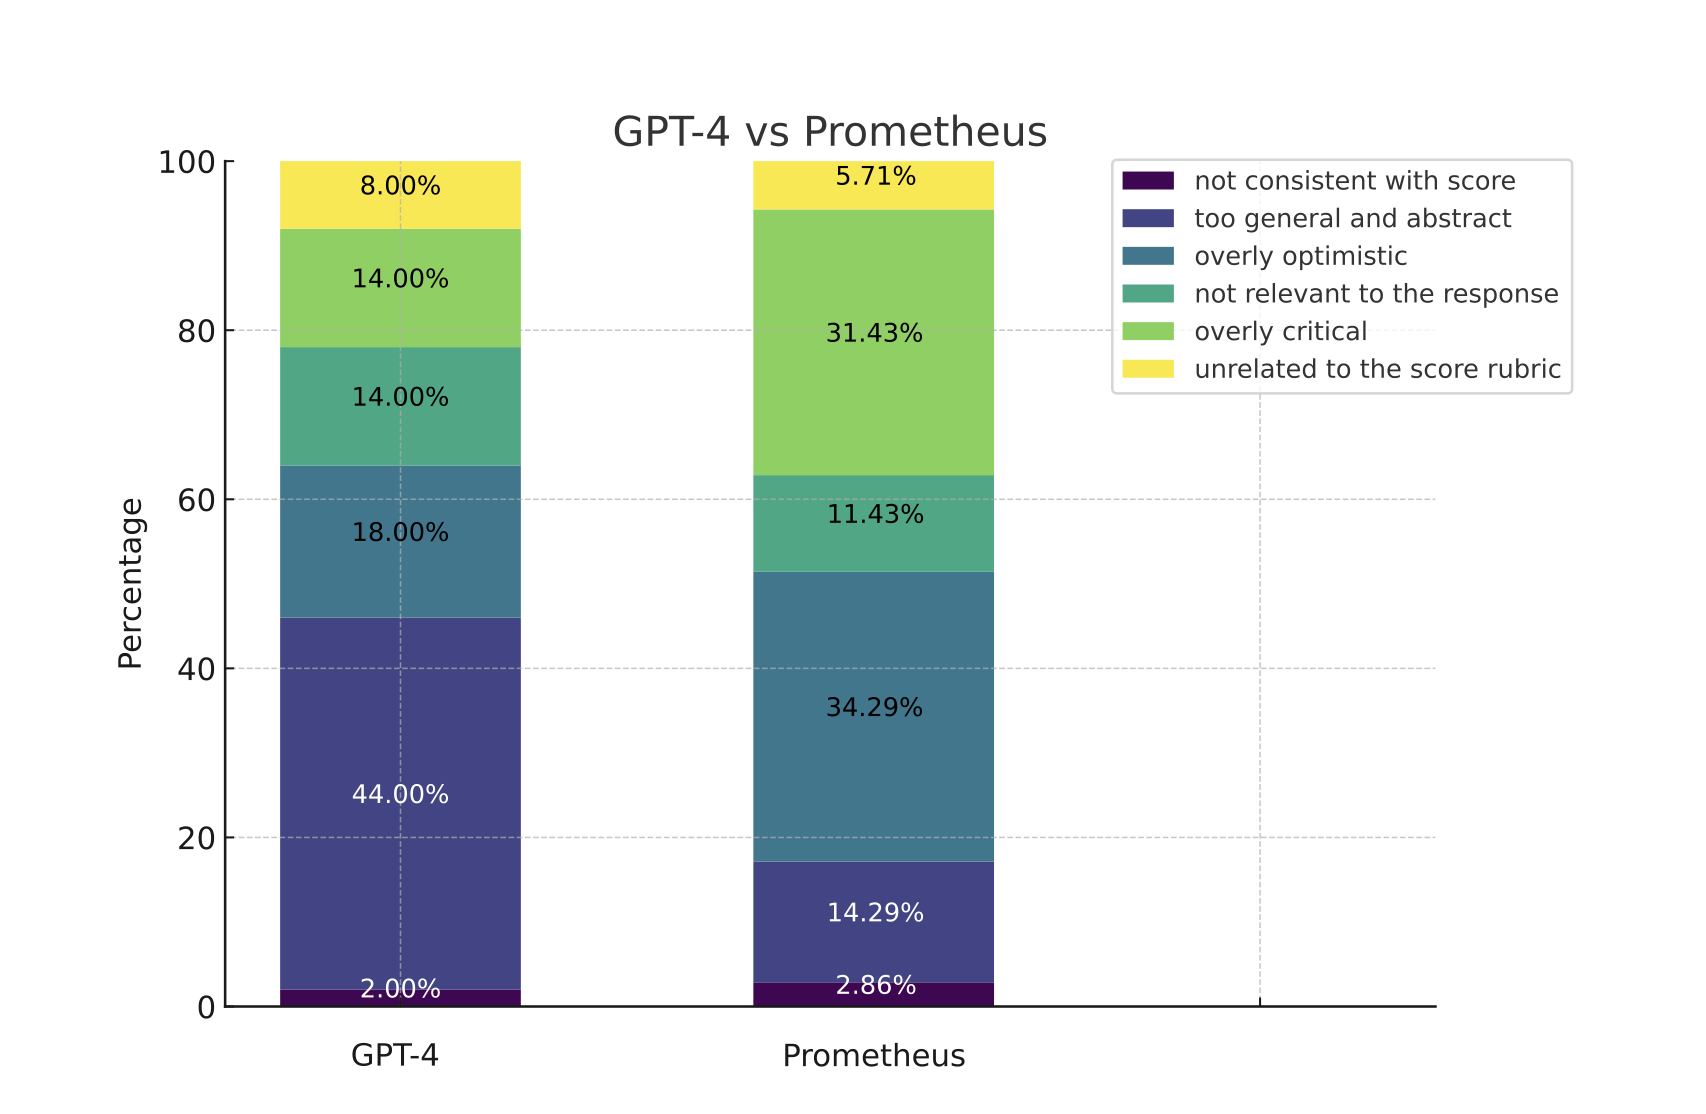

### 📊 Plot Converted to Table with Deplot

,Percentage,not consistent with score,too general and abstract,overly optimistic,not relevant to the response,overly critical,unrelated to the score rubric
0,GPT-4,2.00%,44.0%,18.0%,14.0%,8.00%,8.00%
1,Prometheus,2.86%,14.2%,34.2%,11.4%,31.43%,5.71%


In [34]:
plot_to_table("/kaggle/input/plots-and-tables-images/66d400d78fa4a872b554eaf7_65ae0a296447926f5f649b4a_Screenshot20at20PM.png")

## **Example n°3**

### 📸 Input Image

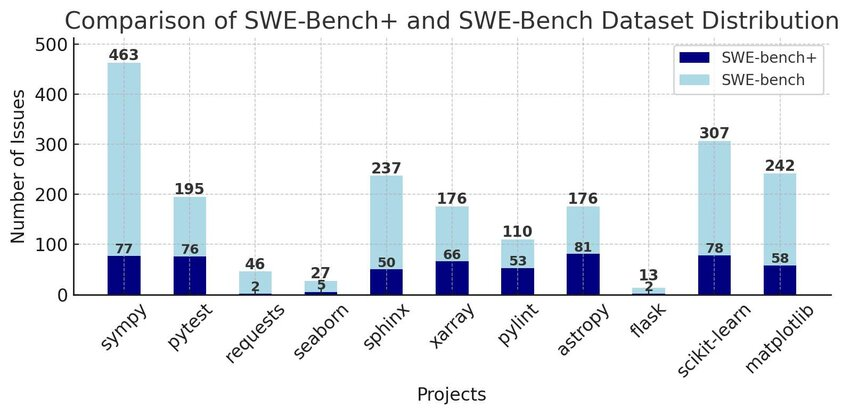

### 📊 Plot Converted to Table with Deplot

,Projects,SWE-bench+,SWE-bench
0,sympy,77,463
1,pytest,76,195
2,requests,2,46
3,seaborn,5,27
4,sphinx,50,237
5,xarray,66,176
6,pylint,53,110
7,astropy,81,176
8,flask,2,13
9,scikit-learn,78,307


In [35]:
plot_to_table("/kaggle/input/plots-and-tables-images/SWE-Bench-dataset-compared-to-SWE-Bench.png")

## **Example n°4**

### 📸 Input Image

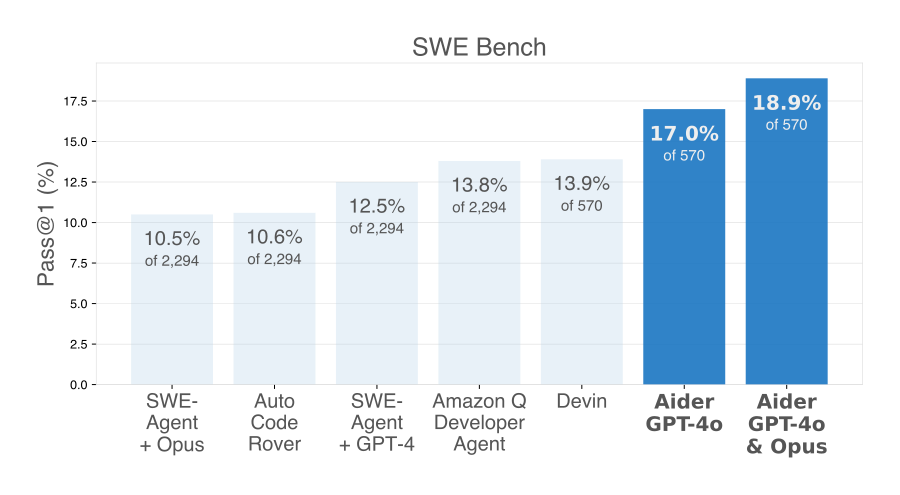

### 📊 Plot Converted to Table with Deplot

,,Pass@1 (%)
0,SWE-,None
1,Agent,None
2,+ Opus,10.5%
3,Auto,None
4,Code,None
5,Rover,10.6%
6,SWE-,None
7,Agent,None
8,+ GPT-4,12.5%
9,Amazon Q,None


In [36]:
plot_to_table("/kaggle/input/plots-and-tables-images/swe_bench.png")

## **Example n°5**

### 📸 Input Image

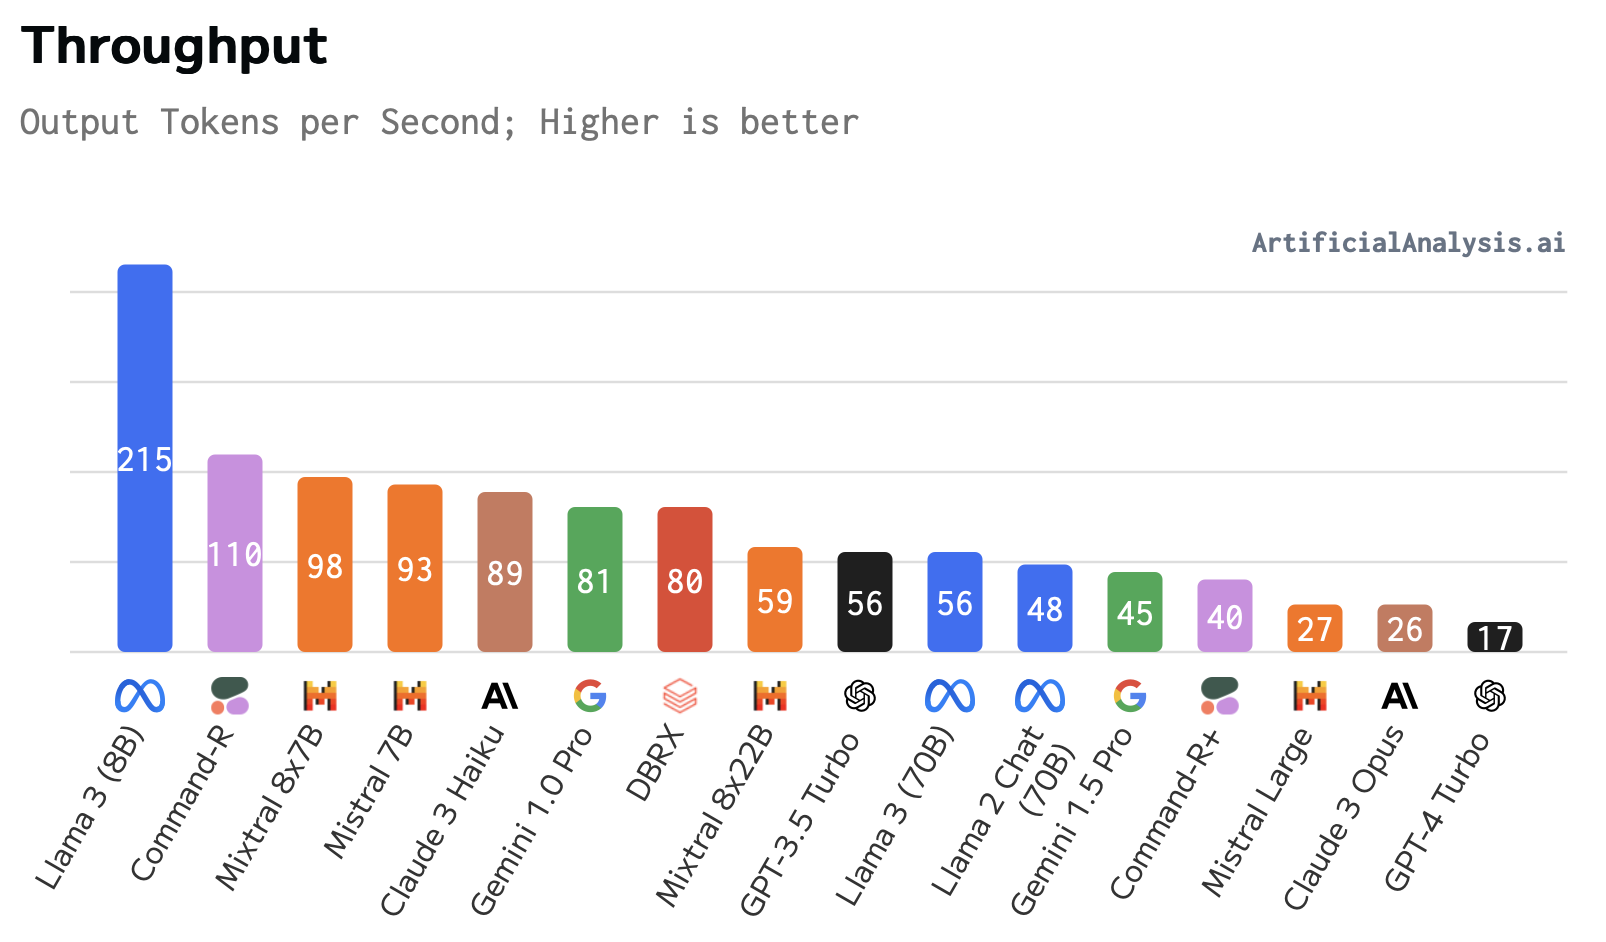

### 📊 Plot Converted to Table with Deplot

,,ArtificialAnalysis
0,Liana 3 (88),215
1,Command-R,110
2,Mistral 8x7B,98
3,Mistral 7B,93
4,Claude 3 Haiku,89
5,Gemini 1.0 Pro,81
6,DBRX,80
7,Mixtral 8x22B,99
8,GPT-3.5 Turbo,56
9,Llama 3 (70B),56


In [37]:
plot_to_table("/kaggle/input/tables-and-plots-for-testing/throughput_by_model.png")

## **Example n°6**

### 📸 Input Image

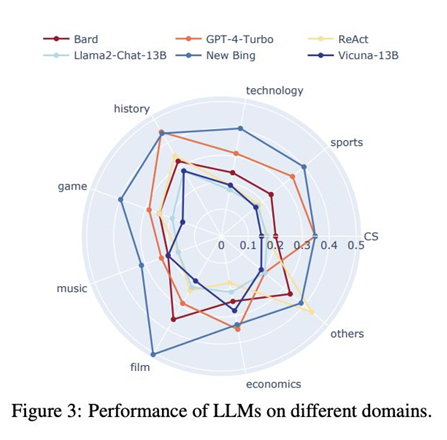

### 📊 Plot Converted to Table with Deplot

,,Bard,Llama2-Chat-13B,GPT-4-Turbo,ReAct,Vicuna-13B
0,film,0.3,0.0,1,0.0,0.0
1,economics,0.2,0.0,0.0,0.0,0.0
2,sports,0.0,0.0,0.0,0.0,0.0


In [38]:
plot_to_table("/kaggle/input/plots-and-tables-images/performance.png")

## **Example n°7**

### 📸 Input Image

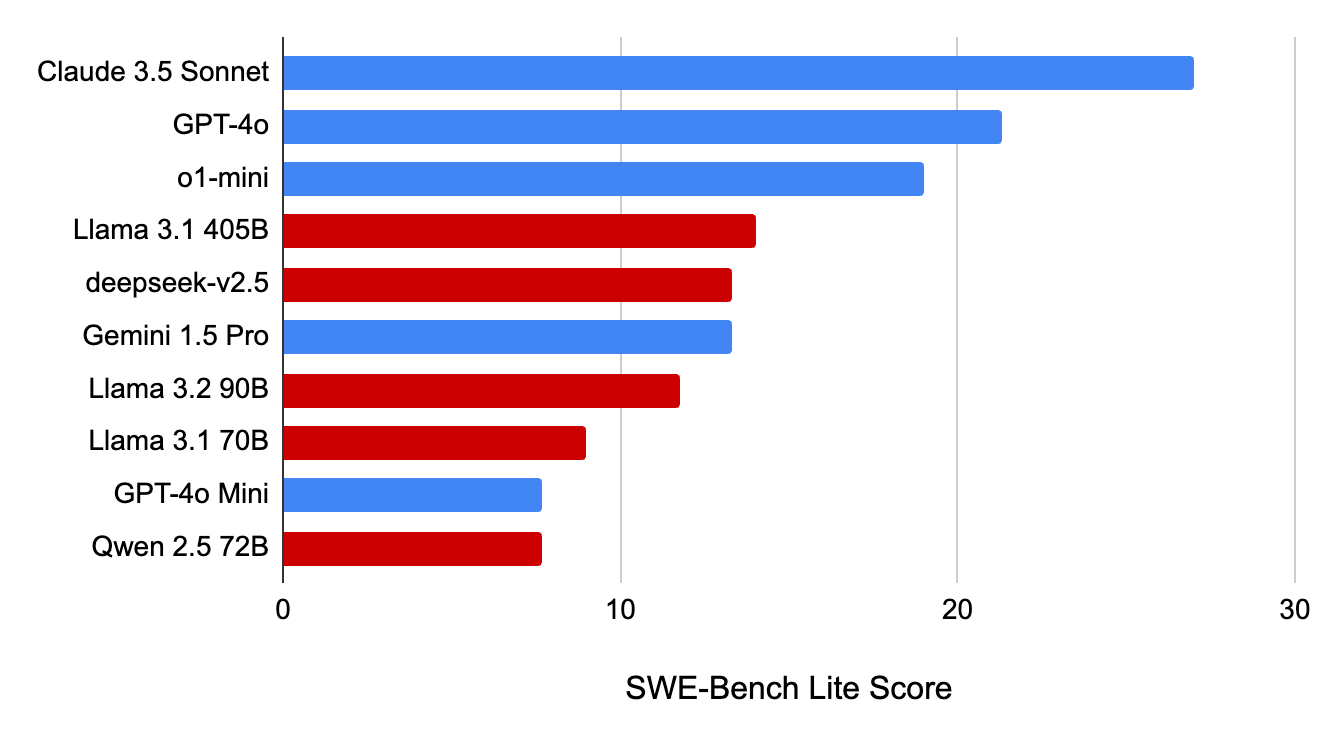

### 📊 Plot Converted to Table with Deplot

,,SWE-Bench Lite Score
0,SWE-Bench Lite Score,27.40
1,GPT-4o Mini,7.60
2,Llama 3.170B,8.90
3,Llama 3.290B,11.90
4,Gemini 1.5 Pro,13.30
5,deepseek-v2.5,13.20
6,Llama 3.1 405B,14.00
7,o1-mini,19.00
8,GPT-4o,21.30
9,Claude 3.5 Sonnet,27.40


In [39]:
plot_to_table("/kaggle/input/tables-and-plots-for-testing/accuracy-bar-chart.png")

## **Example n°8**

### 📸 Input Image

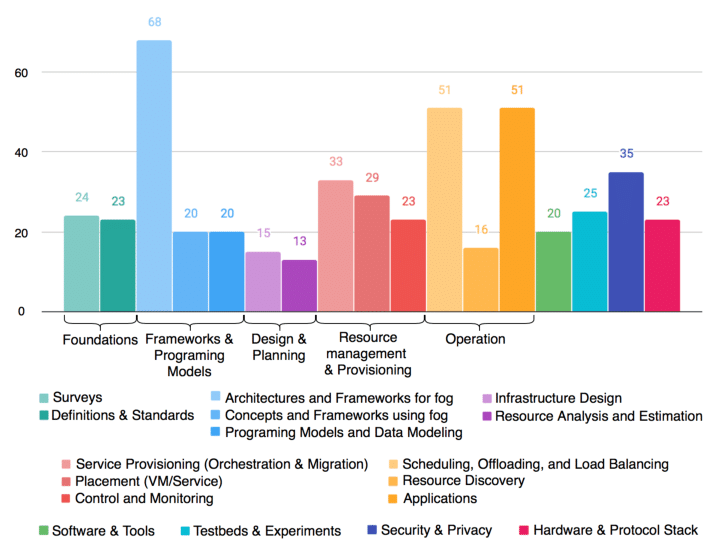

### 📊 Plot Converted to Table with Deplot

,,Software & Tools,Testbeds & Experiments,Security & Privacy,Hardware & Protocol Stack
0,Foundations,24,23,68,68
1,Frameworks & Programming Models,20,20,20,15
2,Design & Planning,15,13,33,29
3,Resource management & Provisioning,23,23,51,16
4,Operation,20,25,35,23


In [40]:
plot_to_table("/kaggle/input/tables-and-plots-for-testing/survey.png")

## **Example n°9**

### 📸 Input Image

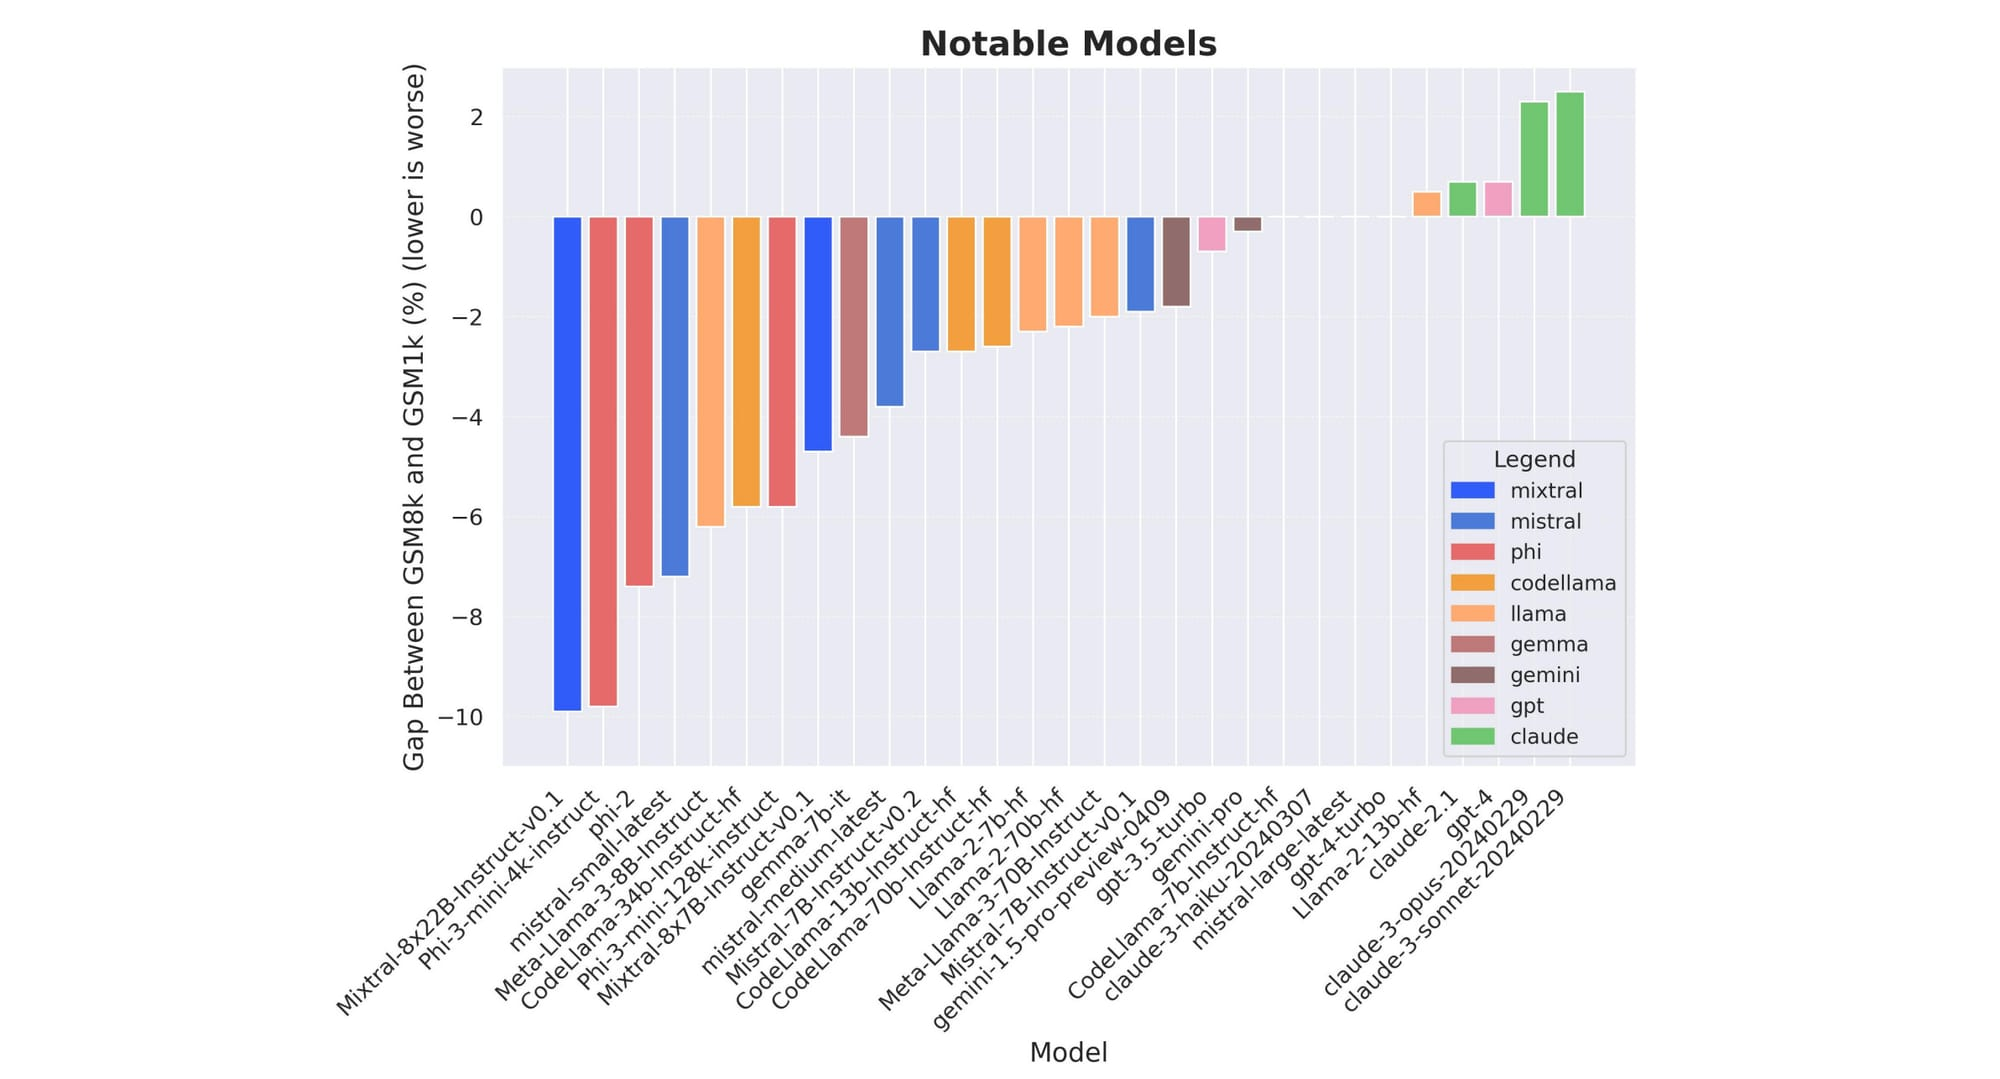

### 📊 Plot Converted to Table with Deplot

,Model,Legend,mistral,ms,,,legend,ms,t
0,Gauge-de-24/Burgeot/Suiza,0,0,0,0,0,0,0,0
1,Mikromat-Lyonel-Boernes-Siemens-Friedrich-Guys...,0,0,0,0,0,0,0,0
2,Eurocopter-230B-Friedrich-Guys-Telephone,0,0,0,0,0,0,0,0
3,Eurocopter-230B-Friedrich-Guys-Telephone,0,0,0,0,0,0,0,0
4,Eurocopter-230B-Friedrich-Gunge-Siemens-Friedr...,0,0,0,0,0,0,0,0
5,Eurocopter-230B-Friedrich-Gunge-Söder,0,0,0,0,0,0,0,0
6,Eurocopter-230B-Friedrich-Gunge-Söder-2,0,0,0,0,0,0,0,0
7,Eurocopter-230B-Friedrich-Gunge-Söder-2,0,0,0,0,0,0,0,0
8,Eurocopter-230B-Friedrich-Gunge-Söder-2,0,0,0,0,0,0,0,0
9,Eurocopter-230B-Friedrich-Gunge-Söder-2,0,0,0,0,0,0,0,0


In [41]:
plot_to_table("/kaggle/input/tables-and-plots-for-testing/gsm8k_vs_gsm1k.jpg")

## **Example n°10**

### 📸 Input Image

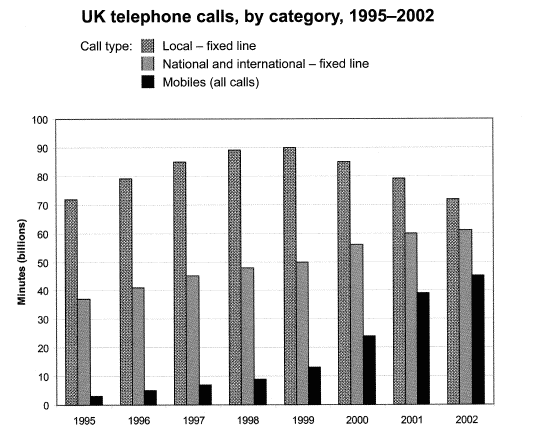

### 📊 Plot Converted to Table with Deplot

,Year,Call type:,Local – fixed line,National and international – fixed line,Mobiles (all calls)
0,1995,72,37,36,3.50
1,1996,79,79,41,5.50
2,1997,86,86,45.40,7.30
3,1998,80,80,48.60,9.20
4,1999,90.30,90.50,50.30,13.50
5,2000,86.20,86.10,56.10,24.20
6,2001,80,80,60.40,39.80
7,2002,72.30,72.40,61.70,46


In [42]:
plot_to_table("/kaggle/input/plots-and-tables-images/ielts-phone-bar-chart-1.png")

## **Example n°11**

### 📸 Input Image

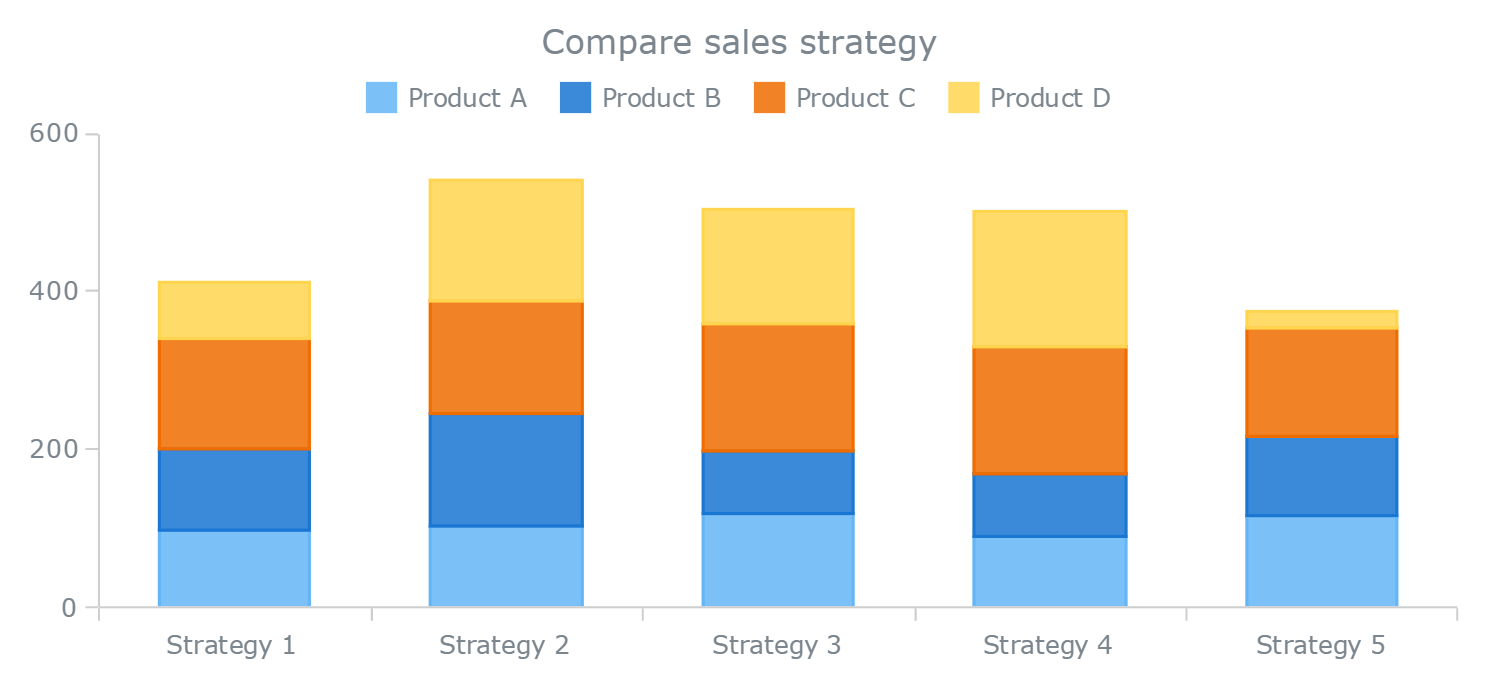

### 📊 Plot Converted to Table with Deplot

,,Product A,Product B,Product C,Product D
0,Strategy 1,97.96,93.95,138.56,70.42
1,Strategy 2,103.09,136.06,136.13,131.95
2,Strategy 3,116.05,217.02,217.02,127.67
3,Strategy 4,92.93,85.95,150.92,131.70
4,Strategy 5,113.87,102.97,142.97,1


In [43]:
plot_to_table("/kaggle/input/plots-and-tables-images/5-stacked-bar-chart-large-opt (1).png")

## **Example n°12**

### 📸 Input Image

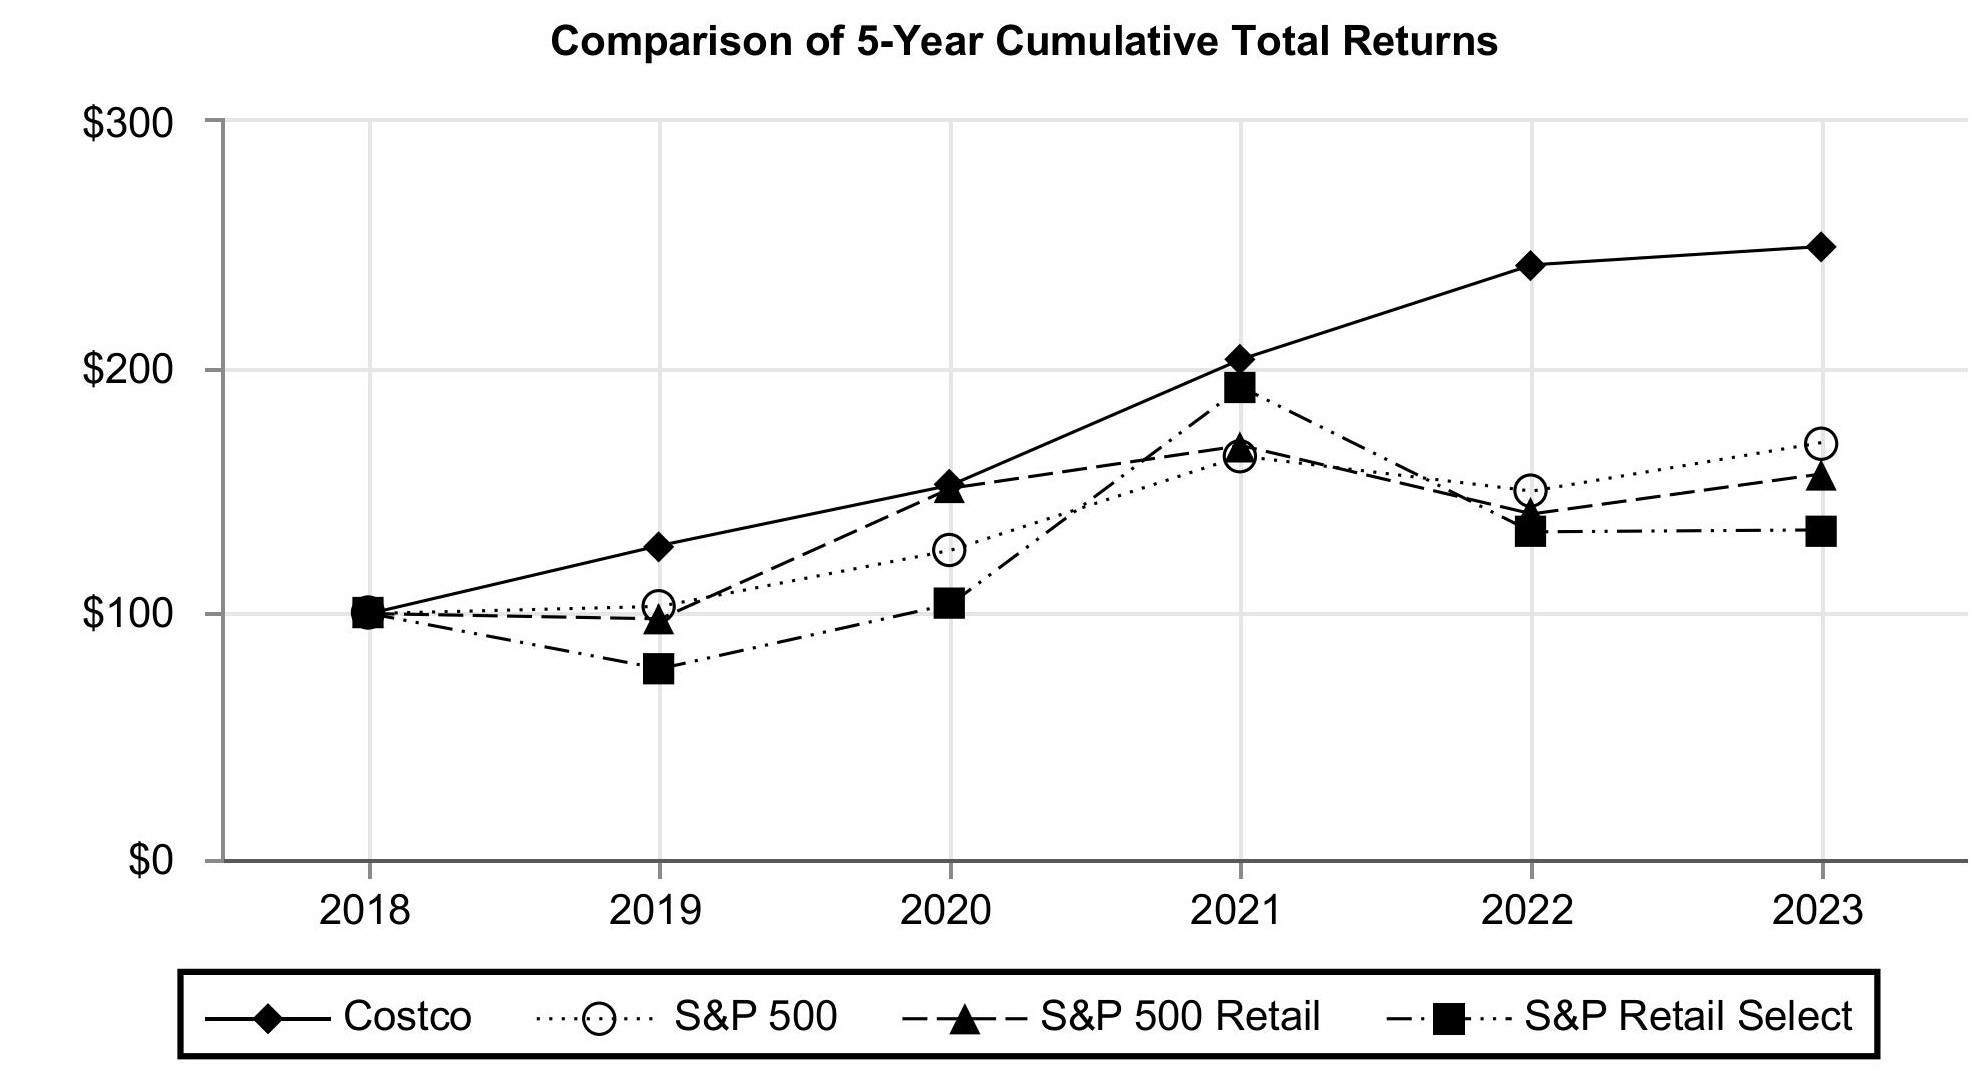

### 📊 Plot Converted to Table with Deplot

,Comparison of 5-Year Cumulative Total Returns,Costco,S&P 500,S&P 500 Retail,S&P Retail Select
0,2018,59.77,51.01,51.38,59.49
1,2019,66.33,50.00,49.14,67.49
2,2020,51.02,51.42,51.55,51.68
3,2021,520.43,51.67,51.91,51.86
4,2022,524.15,51.74,51.36,51.44
5,2023,525.04,51.68,51.32,51.39


In [44]:
plot_to_table("/kaggle/input/plots-and-tables-images/plot_8.jpg")

## **Example n°13**

### 📸 Input Image

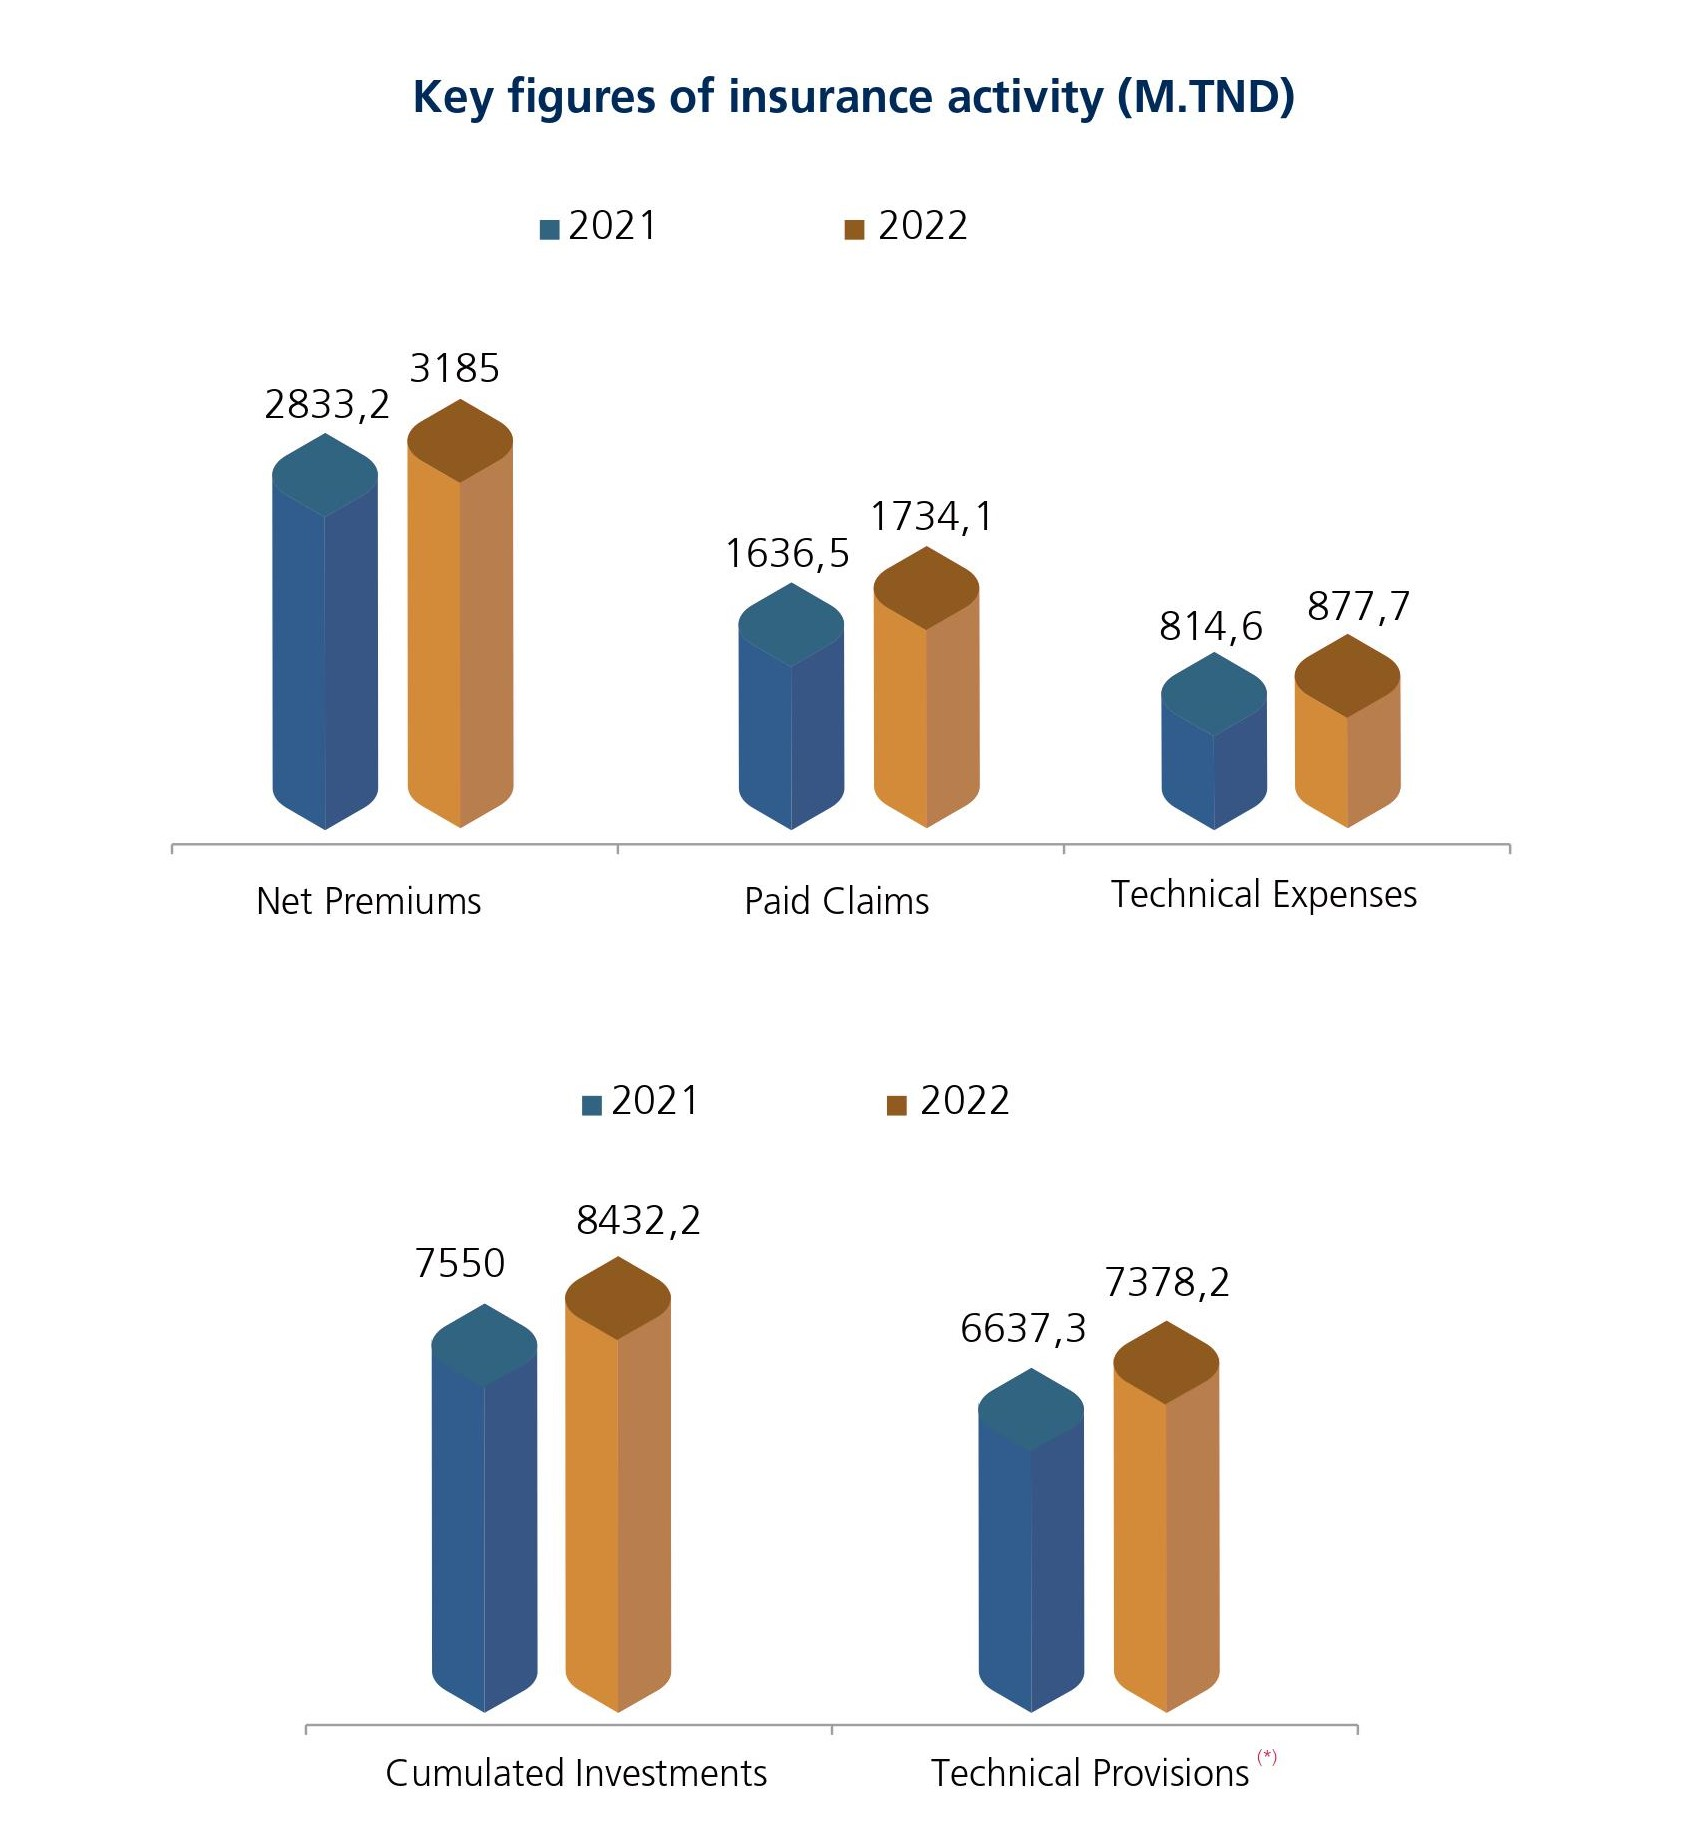

### 📊 Plot Converted to Table with Deplot

,,2021,2022
0,Net Premiums,2833.2,3185.0
1,Paid Claims,1636.5,1734.1
2,Technical Expenses,814.6,877.7


In [45]:
plot_to_table("/kaggle/input/tables-and-plots-for-testing/bar_plot_cga.jpg")

## **Example n°14**

### 📸 Input Image

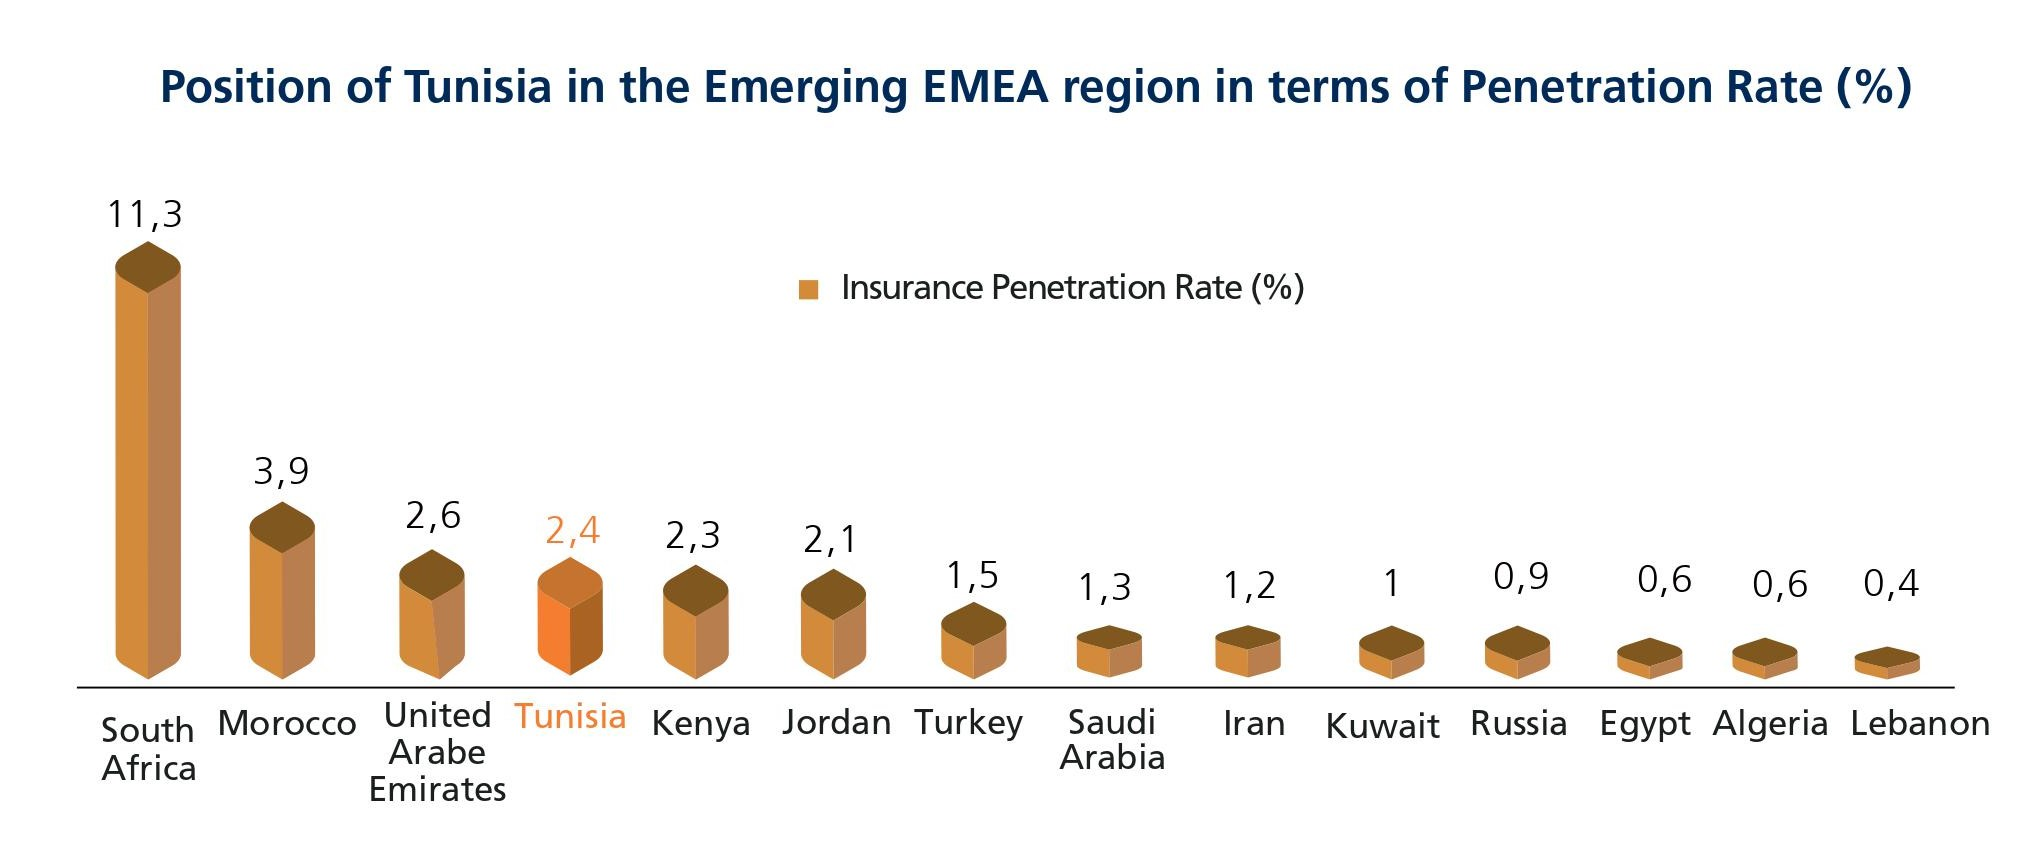

### 📊 Plot Converted to Table with Deplot

,Country,Insurance Penetration Rate (%)
0,South Africa,11.3
1,Morocco,3.9
2,United Arabe,None
3,Emirates,2.6
4,Tunisia,2.4
5,Kenya,2.3
6,Jordan,2.1
7,Turkey,1.50
8,Saudi Arabia,1.30
9,Iran,1.20


In [46]:
plot_to_table("/kaggle/input/tables-and-plots-for-testing/cga_2022_bar_plot_1.jpg")

## **Example n°15**

### 📸 Input Image

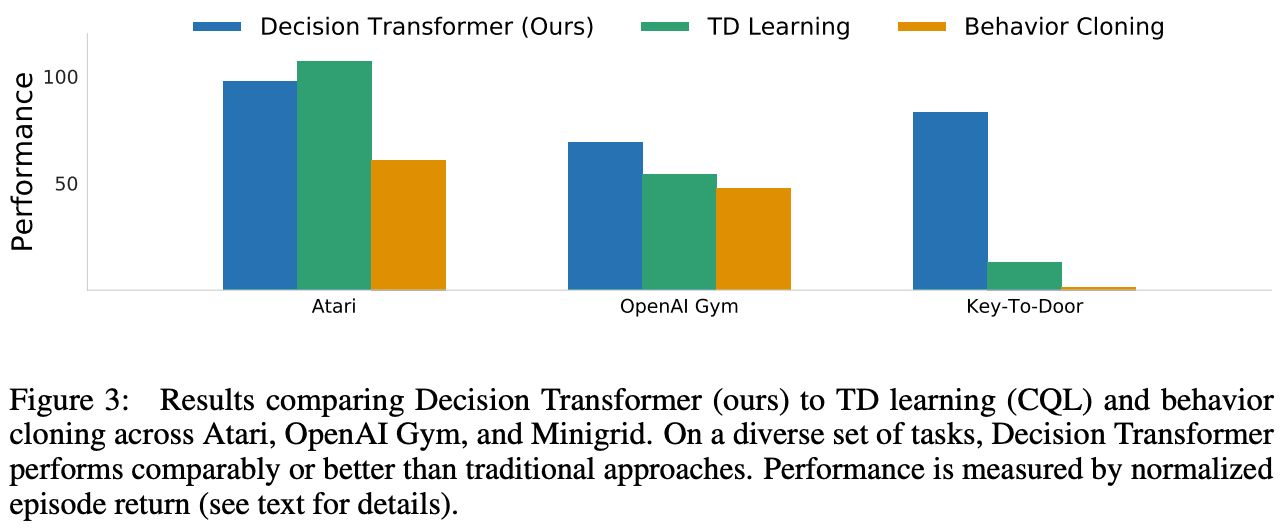

### 📊 Plot Converted to Table with Deplot

,Performance,Decision Transformer (Ours),TD Learning,Behavior Cloning
0,Atari,98.7,108.0,61.5
1,OpenAI Gym,69.5,54.5,48.5
2,Key-To-Door,83.3,15.0,1.5


In [47]:
plot_to_table("/kaggle/input/tables-and-plots-for-testing/_2021-07-17_18.52.19-min.png")

## **Example n°16**

### 📸 Input Image

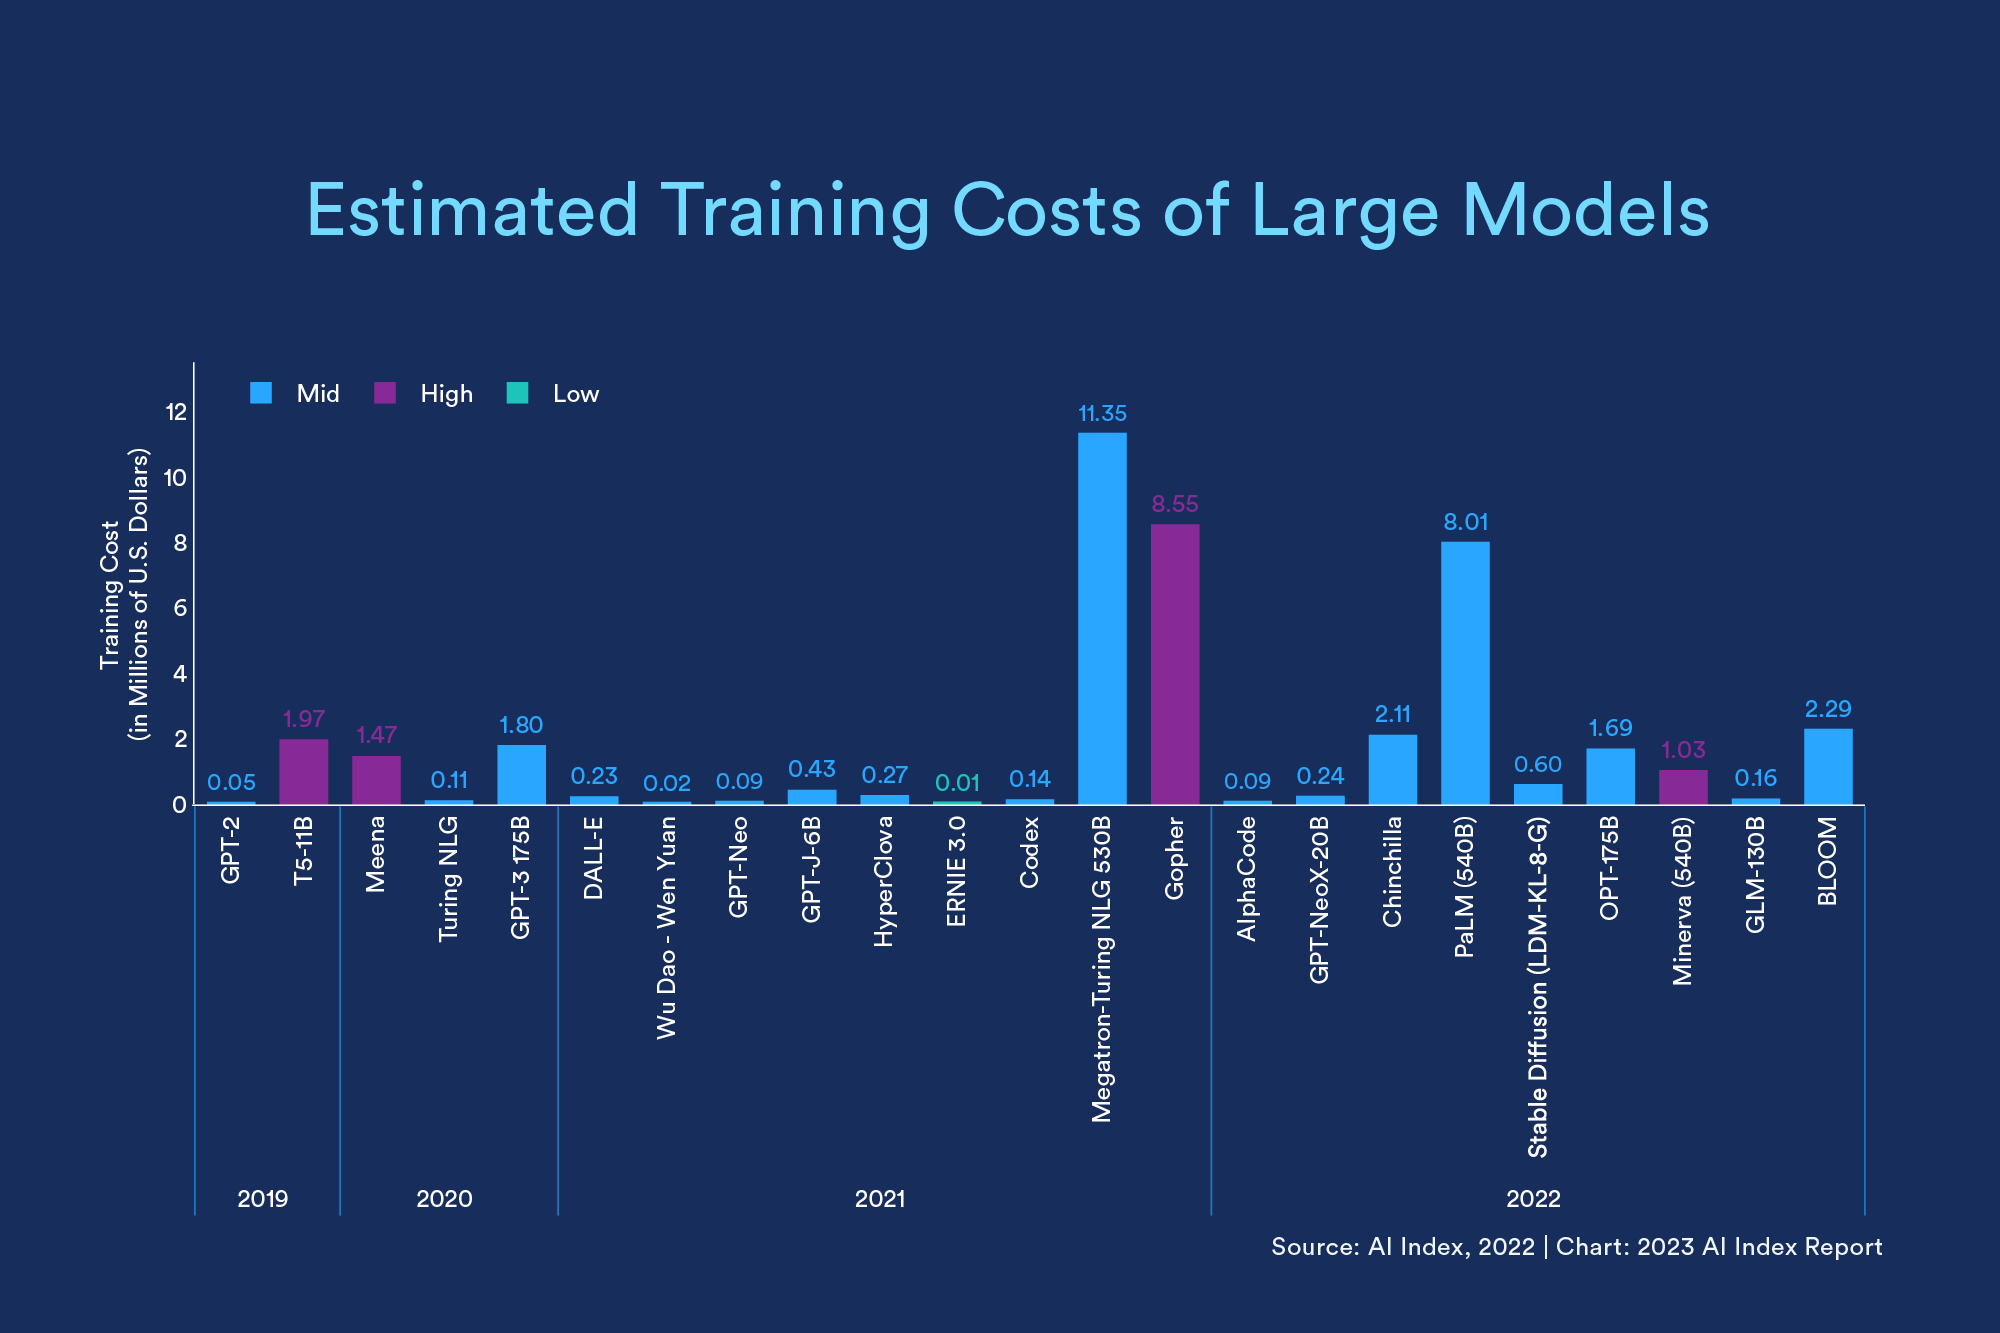

### 📊 Plot Converted to Table with Deplot

,In Miniseries or Lucas4008.17,Mid,High,Low
0,2019,0.08,1.97,1.47
1,2020,0.10,1.40,0.10
2,2021,0.08,1.60,0.09
3,2022,0.08,1.60,0.01
4,2023,0.23,1.60,0.09
5,2024,0.09,1.60,0.02
6,2025,0.09,1.60,0.04
7,2026,0.09,1.60,0.01
8,2027,0.08,1.60,0.01
9,2028,0.09,1.60,0.01


In [48]:
plot_to_table("/kaggle/input/tables-and-plots-for-testing/AIIndex_2023_StateofAI_Blog_2.jpg")

## **Example n°17**

### 📸 Input Image

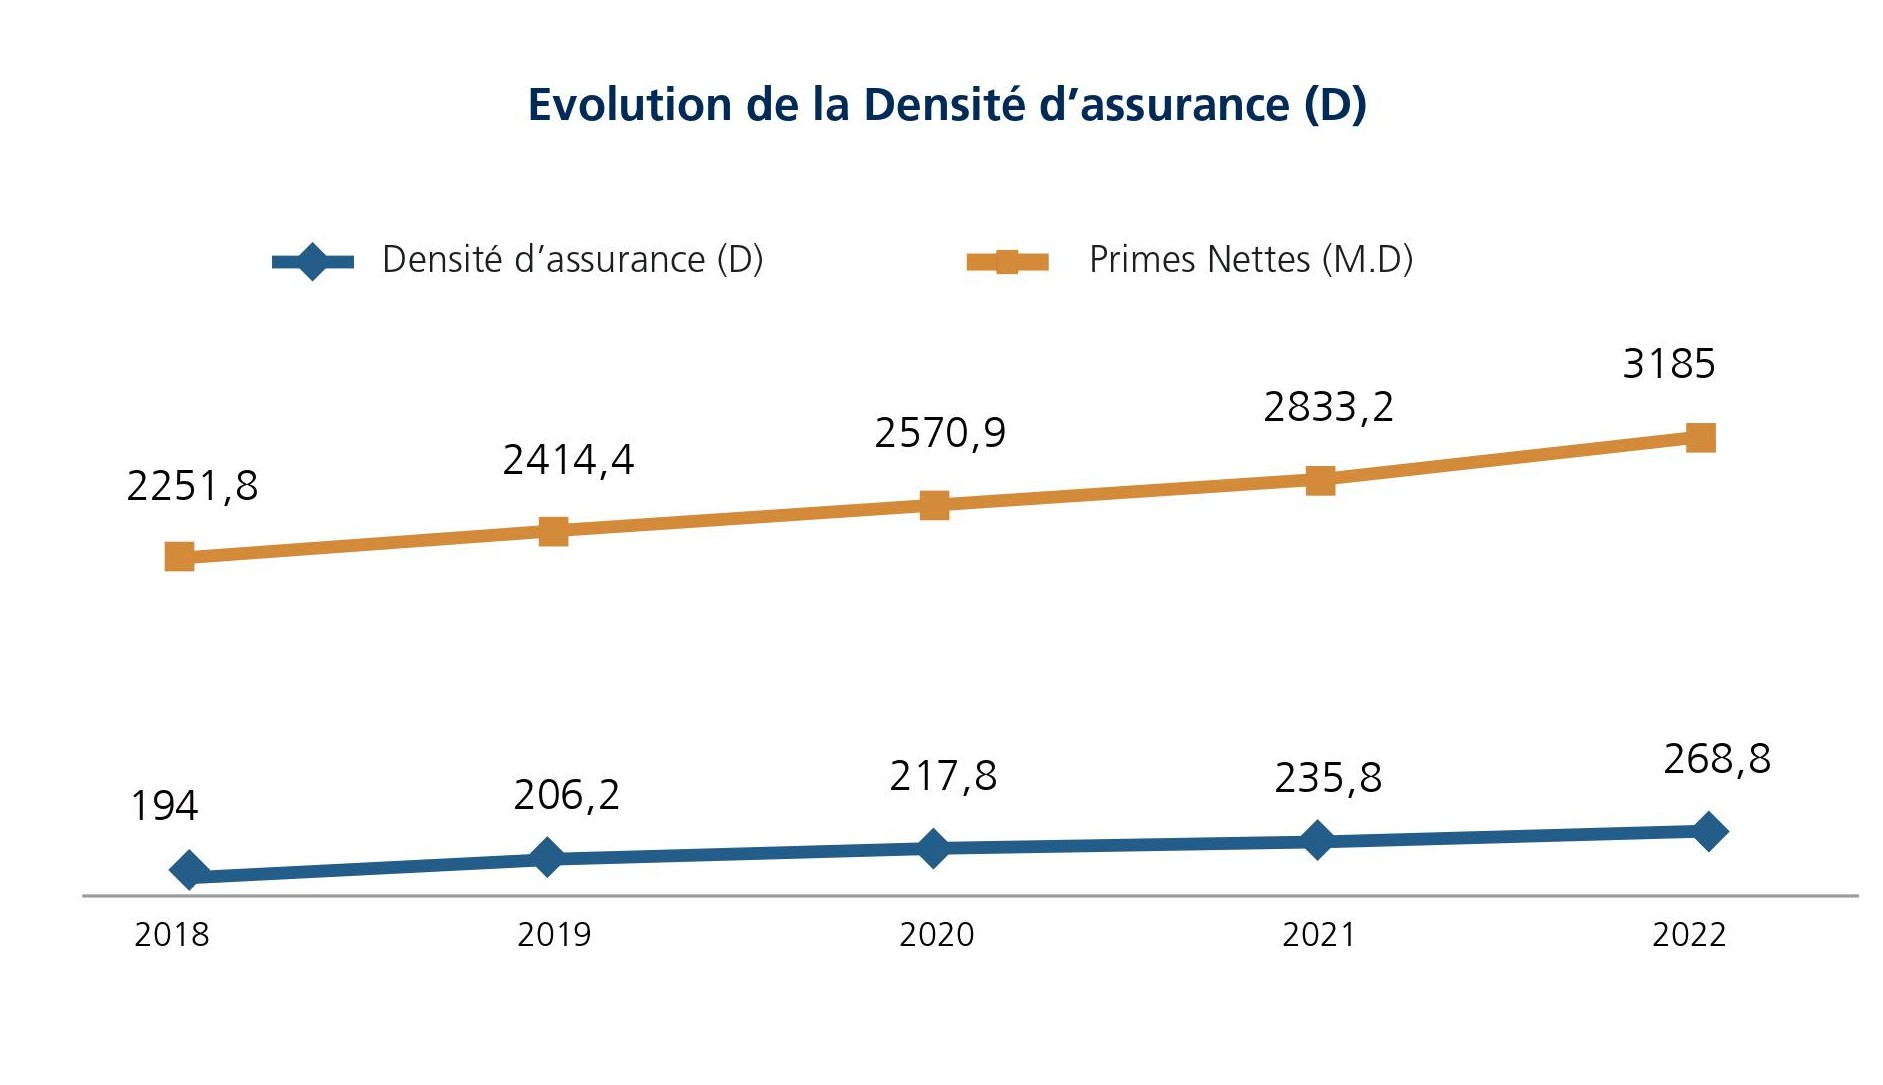

### 📊 Plot Converted to Table with Deplot

,Year,Densité d’assurance (D),Primes Nettes (M.D)
0,2018,194,"2251,8"
1,2019,"206,2","2414,4"
2,2020,"217,8","2570,9"
3,2021,"235,8","2833,2"
4,2022,"268,8",3185


In [49]:
plot_to_table("/kaggle/input/tables-and-plots-for-testing/line_plot_cga.jpg")

# **Conclusion**

While the DePlot model demonstrated its ability to extract data from charts accurately in many cases, it also exhibited limitations in several instances. Despite successfully converting visual data into structured tables, the model struggled with certain chart types and layouts, leading to inaccurate or incomplete data extraction. These inconsistencies suggest that while DePlot shows promise for chart-to-data conversion, it still lacks the robustness needed for reliable and comprehensive data extraction across diverse chart formats. As such, its capacity to fully meet the requirements for precise data extraction remains limited.